In [2]:
import numpy as np
import matplotlib.pyplot as plt

from aeons.utils import *
from aeons.endpoint import *
from aeons.plotting import *
from aeons.regress import *

In [5]:
chain, samples = get_samples("toy", "cauchy_10_0001")
endpoint = IncrementEndpoint(samples, N_rolling=500)
iters, preds = endpoint.predictions(N=50, steps=10, step=200)

In [6]:
model = EndModel(samples)
true_endpoint = model.true_endpoint()

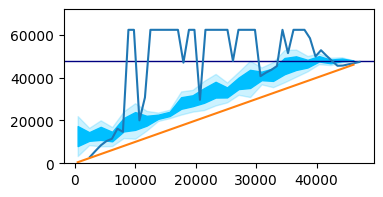

In [7]:
root = "toy"
config = "nos"
iterations, logXfs, logXfs_std, true_endpoint = read_from_txt(f"{root}/{config}/{chain}_bt_25_nos.txt")
logXs = samples.logX().iloc[iterations]
endpoints, endpoints_std = calc_endpoints(iterations, logXs, logXfs, logXfs_std, nlive=500)
plot_std(iterations, endpoints, endpoints_std, true_endpoint, ylim=1.5)
plt.plot(iters, preds)
plt.plot(iterations, iterations)

### Planck chains

In [3]:
root, chain = "lcdm", "planck_lensing"
config = "s4"
name, samples = get_samples(root, chain)
iterations, logXfs, logXfs_std, true_endpoint = read_from_txt(f"{root}/{config}/{chain}_bt_25_t5.txt")

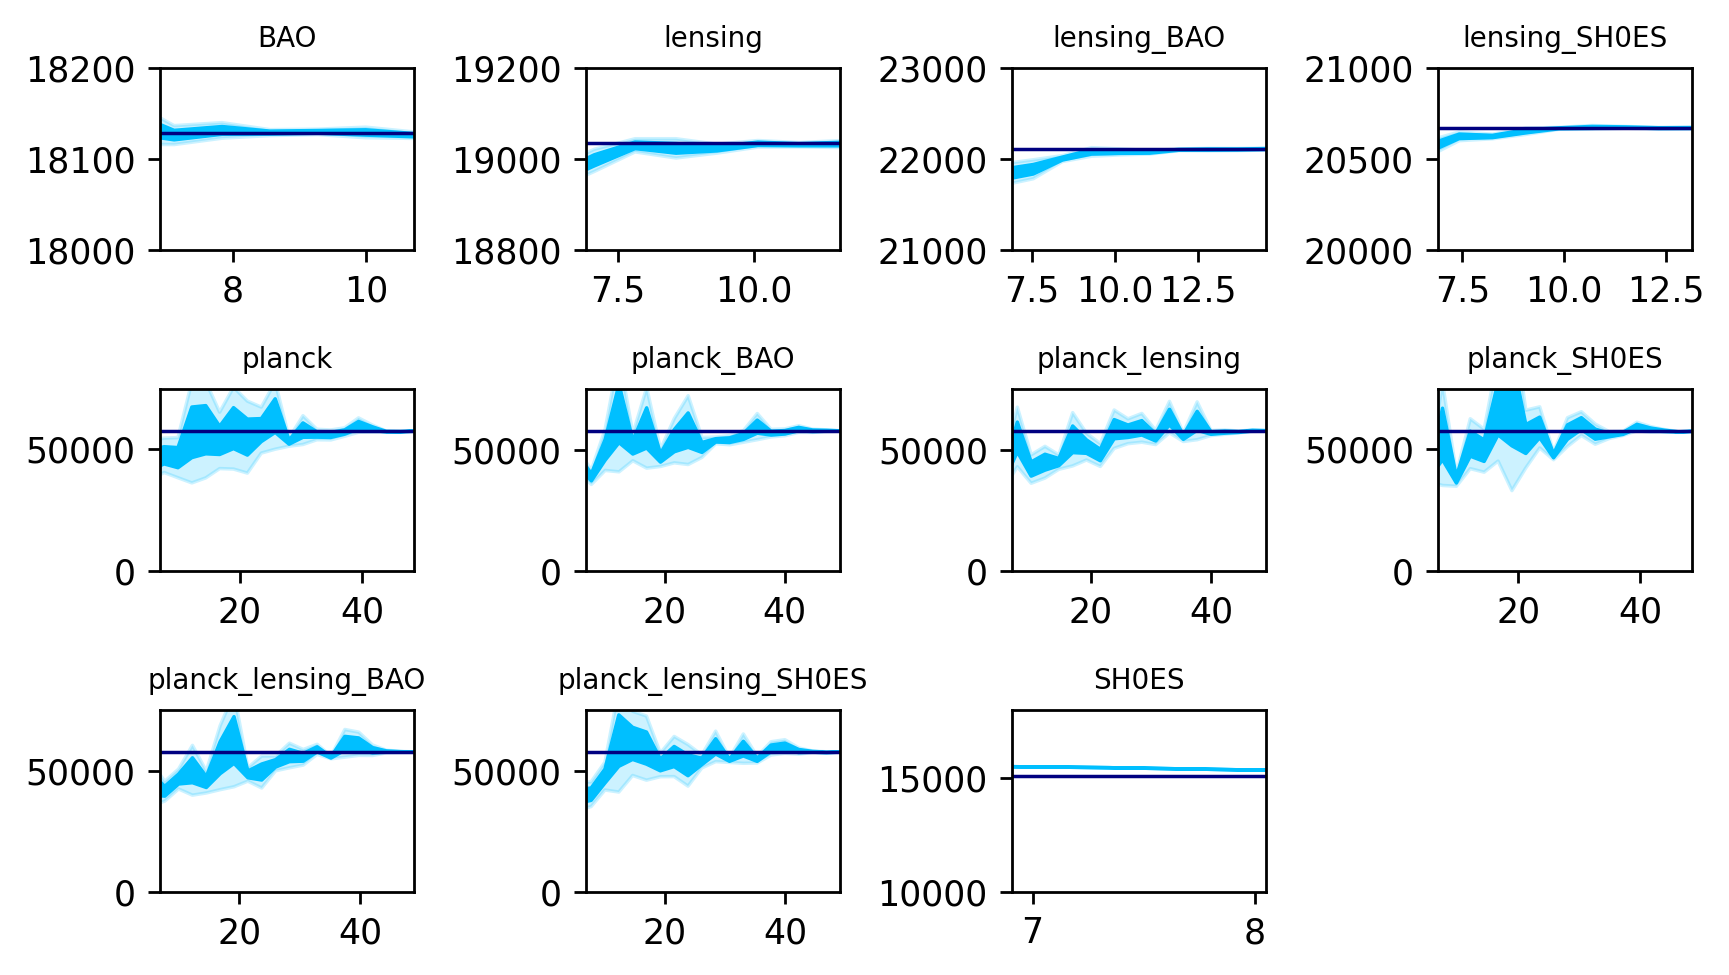

In [5]:
# With splitting
fig, axs = plt.subplots(3, 4, figsize=(7, 4), dpi=250)
axs = axs.flatten()
fig.delaxes(axs[-1])
for i, chain in enumerate(lcdm_chains):
    name, samples = get_samples('lcdm', chain)
    iterations, logXfs, logXfs_std, true_endpoint = read_from_txt(f"lcdm/s4/{chain}_bt_25_t5.txt")
    logXs = samples.logX().iloc[iterations]
    endpoints, endpoints_std = calc_endpoints(iterations, logXs, logXfs, logXfs_std, nlive=1000)
    plot_std(-logXs, endpoints, endpoints_std, true_endpoint, ylim=1.3, ax=axs[i])
    axs[i].set_title(name, fontsize=8)
    axs[i].set_xlim(-np.log(1e-3), -logXs.iloc[-1])
axs[0].set_ylim(18000, 18200)
axs[1].set_ylim(18800, 19200)
axs[2].set_ylim(21000, 23000)
axs[3].set_ylim(20000, 21000)
axs[10].set_ylim(10000, 18000)
fig.tight_layout()

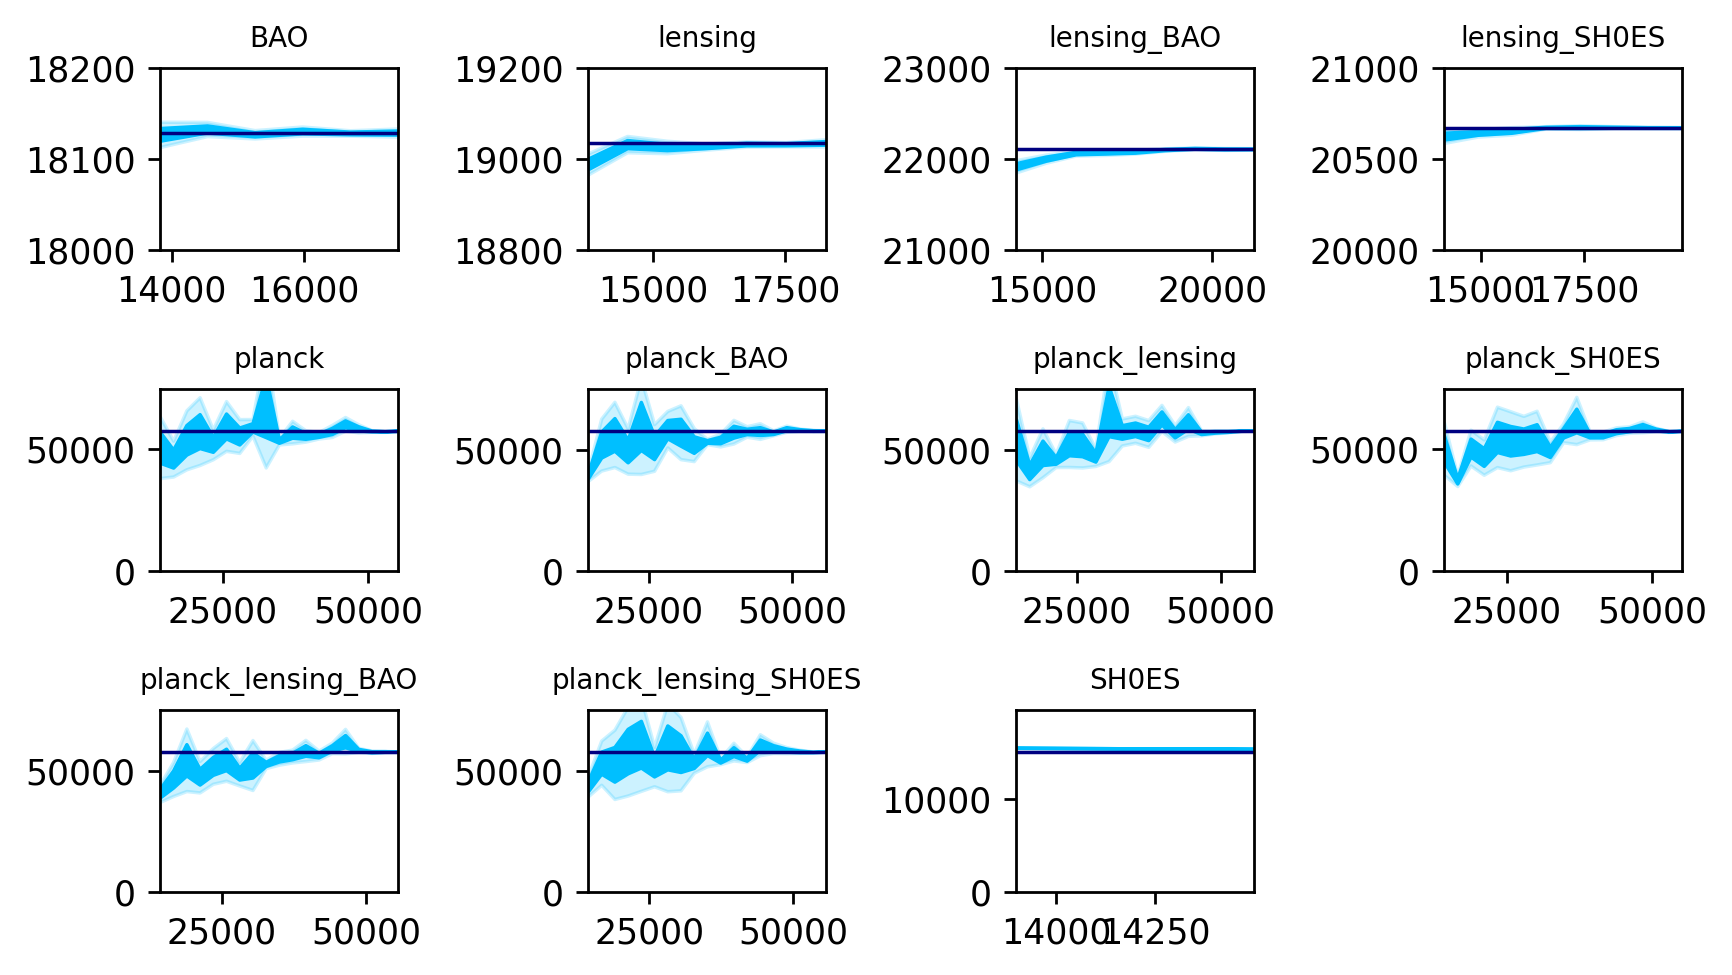

In [41]:
# Without splitting
fig, axs = plt.subplots(3, 4, figsize=(7, 4), dpi=250)
axs = axs.flatten()
fig.delaxes(axs[-1])
for i, chain in enumerate(lcdm_chains):
    name, samples = get_samples('lcdm', chain)
    iterations, logXfs, logXfs_std, true_end/point = read_from_txt(f"lcdm/nos/{chain}_bt_25_nos.txt")
    logXs = samples.logX().iloc[iterations]
    endpoints, endpoints_std = calc_endpoints(iterations, logXs, logXfs, logXfs_std, nlive=1000)
    plot_std(iterations, endpoints, endpoints_std, true_endpoint, ylim=1.3, ax=axs[i])
    axs[i].set_title(name, fontsize=8)
    # Set x limits for iterations to start when logXs < 1e-3
    axs[i].set_xlim(iterations[np.argmin(logXs > np.log(1e-3))], iterations[-1])
axs[0].set_ylim(18000, 18200)
axs[1].set_ylim(18800, 19200)
axs[2].set_ylim(21000, 23000)
axs[3].set_ylim(20000, 21000)
# axs[10].set_ylim(14500, 15500)
fig.tight_layout()

### Toy samples - no splitting

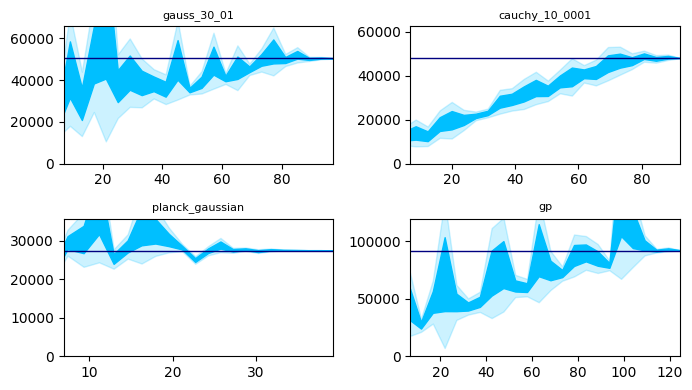

In [76]:
# No splitting
fig, axs = plt.subplots(2, 2, figsize=(7, 4), dpi=100)
axs = axs.flatten()
root = "toy"
config = "nos"
chains = ["gauss_30_01", "cauchy_10_0001", "planck_gaussian", "gp"]
nlives = [500, 500, 750, 750]
for i, chain in enumerate(chains):
    name, samples = get_samples(root, chain)
    iterations, logXfs, logXfs_std, true_endpoint = read_from_txt(f"{root}/{config}/{chain}_bt_25_nos.txt")
    logXs = samples.logX().iloc[iterations]
    endpoints, endpoints_std = calc_endpoints(iterations, logXs, logXfs, logXfs_std, nlive=nlives[i])
    plot_std(-logXs, endpoints, endpoints_std, true_endpoint, ylim=1.3, ax=axs[i])
    axs[i].set_title(name, fontsize=8)
    axs[i].set_xlim(-np.log(1e-3), -logXs.iloc[-1])
# axs[0].set_ylim(18000, 18200)
# axs[1].set_ylim(18800, 19200)
# axs[2].set_ylim(21000, 23000)
# axs[3].set_ylim(20000, 21000)
fig.tight_layout()

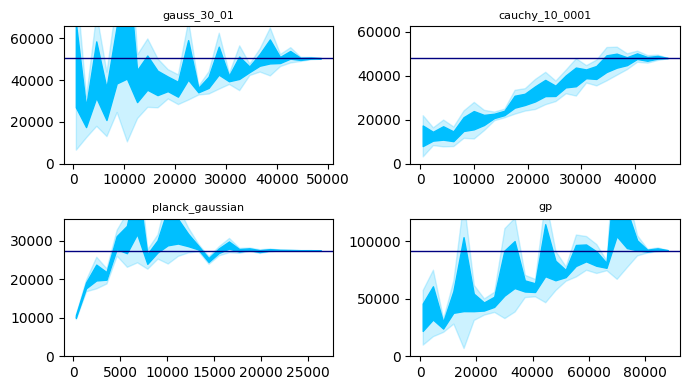

In [77]:
fig, axs = plt.subplots(2, 2, figsize=(7, 4), dpi=100)
axs = axs.flatten()
root = "toy"
config = "nos"
chains = ["gauss_30_01", "cauchy_10_0001", "planck_gaussian", "gp"]
nlives = [500, 500, 750, 750]
for i, chain in enumerate(chains):
    name, samples = get_samples(root, chain)
    iterations, logXfs, logXfs_std, true_endpoint = read_from_txt(f"{root}/{config}/{chain}_bt_25_nos.txt")
    logXs = samples.logX().iloc[iterations]
    endpoints, endpoints_std = calc_endpoints(iterations, logXs, logXfs, logXfs_std, nlive=nlives[i])
    plot_std(iterations, endpoints, endpoints_std, true_endpoint, ylim=1.3, ax=axs[i])
    axs[i].set_title(name, fontsize=8)
    # axs[i].set_xlim(-np.log(1e-3), -logXs.iloc[-1])
fig.tight_layout()